In [1]:
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
import sklearn

sys.path.insert(0, r"C:\Users\parkf\Desktop\summer2021\projectFilesGitManaged") #temporaraly add the path we need for function list to PATH
import functionList

In [2]:
ar = 3
l = 50
if ar == 2:
    seed(1)
    series = [gauss(0.0, 1.0) for i in range(l)]
    eSeriesX = Series(series)

    seed(2)
    series = [gauss(0.0, 1.0) for i in range(l)]
    eSeriesY = Series(series)


    x_1 = np.zeros((l,1))
    x_2 = np.zeros((l,1))
    for i in range(l):
        x_1[i] = .9*x_1[i-1] - .5*x_1[i-2] + eSeriesX[i]
        x_2[i] = .8*x_2[i-1] - .5*x_2[i-2] + .16*x_1[i-1] - .2*x_1[i-2] + eSeriesY[i]
    X = np.hstack((x_1,x_2))
elif ar == 3:
    eSeriesX = np.zeros((5,l))

    for i in range(5):
        seed(i)
        series = [gauss(0.0, 1.0) for i in range(l)]
        eSeriesX[i,:] = Series(series)
    X = np.zeros((5,l))
    for i in range(l):
        X[0,i] = .95*np.sqrt(2)*X[0,i-1] - .9025*X[0,i-2] + eSeriesX[0,i]
        X[1,i] = .5*X[0,i-2] + eSeriesX[1,i]
        X[2,i] = -.4*X[0,i-3] + eSeriesX[2,i]
        X[3,i] = -.5*X[0,i-2] + .25*np.sqrt(2)*X[3,i-1] + .25*np.sqrt(2)*X[4,i-1] + eSeriesX[3,i]
        X[4,i] = -.25*np.sqrt(2)*X[3,i-1] + .25*np.sqrt(2)*X[4,i-1] + eSeriesX[4,i]
    X = np.transpose(X)


cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
cholesky
c

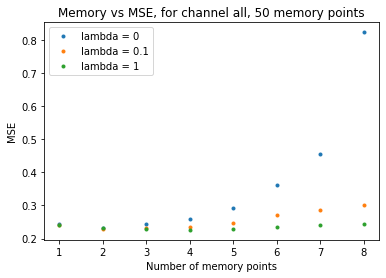

In [4]:
memVec = [1, 2, 3, 4, 5, 6, 7, 8]
ridgeVec = [0, .1, 1]
cv = 10
chan = "all"
error = np.zeros((len(memVec), len(ridgeVec), cv))

for memNum in memVec:
    featureMat = functionList.buildFeatureMat(X, memNum)
    for L in ridgeVec:
        L_normal = L*len(X)
        crossVal = sklearn.model_selection.KFold(n_splits=cv)
        cvRun = 0
        for train, test in crossVal.split(featureMat):
            pred = functionList.predRrOutput(featureMat[train,:], featureMat[test,:], X[train,:], L_normal)
            #RR = sklearn.linear_model.Ridge(alpha=L_normal)
            #RR.fit(featureMat[train,:],X[train,:])
            #pred = RR.predict(featureMat[test,:])
            error[memVec.index(memNum), ridgeVec.index(L), cvRun] = functionList.findMSE(pred[:], X[test], 0, 0)
            cvRun = cvRun + 1 
errNoCv = np.mean(error, 2)

titleString = f"Memory vs MSE, for channel {chan}, {l} memory points"
plt.title(titleString)
for i in range(len(ridgeVec)):
    plt.plot(memVec[:], errNoCv[:, i], ".", label = f"lambda = {ridgeVec[i]}") ## figure out columns to pass
    plt.xlabel("Number of memory points")
    plt.ylabel("MSE")
plt.legend()
plt.show()